# Page View Time Series Analyzer

Let's visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [1]:
#import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#read the data
df = pd.read_csv(r"C:\Users\*****\Downloads\fcc-forum-pageviews.csv", parse_dates = ["date"], index_col = "date")

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [3]:
# Clean data
df = df[
  (df["value"] >= df["value"].quantile(0.025)) &
  (df["value"] <= df["value"].quantile(0.975))
]

Create a draw_line_plot function that uses Matplotlib to draw a line chart. The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

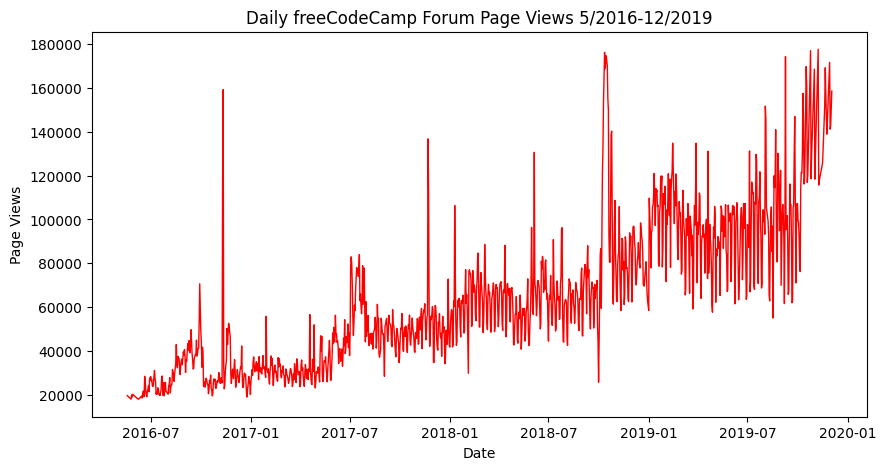

In [4]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(df.index, df['value'], 'r', linewidth=1)

    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    
draw_line_plot()

Create a draw_bar_plot function that draws a bar chart. It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

C:\Users\samue\AppData\Local\Temp\ipykernel_11856\865904466.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  fig= df_bar.pivot('year','month','Month Avg').plot(kind='bar', figsize=(10,10)).figure


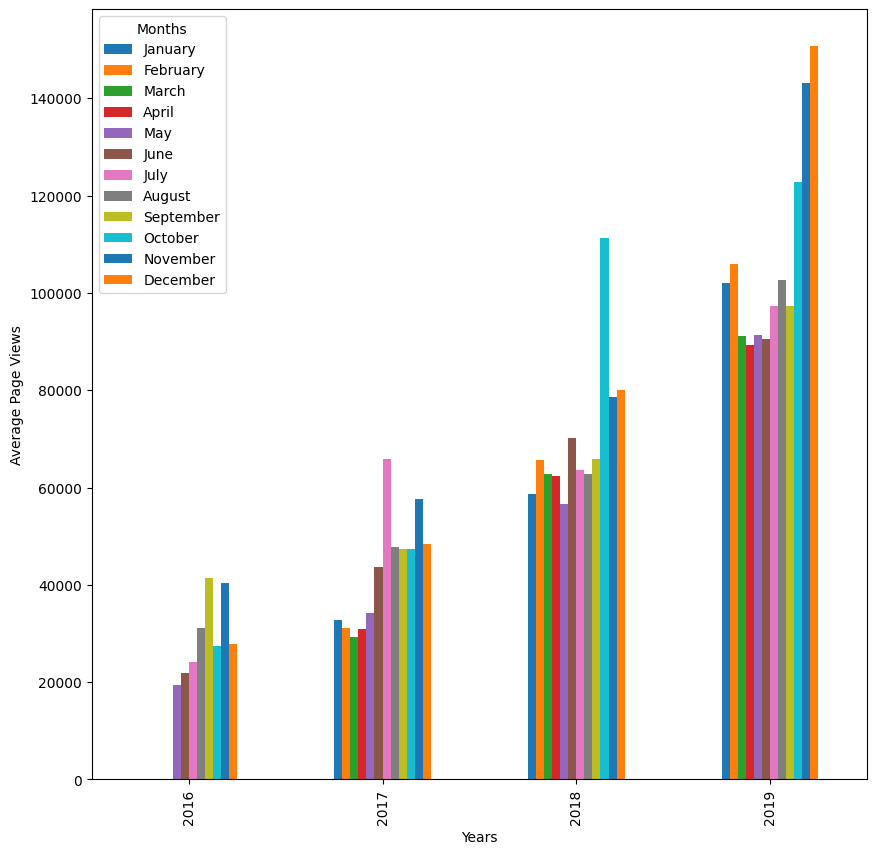

In [5]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    
    df_bar = df.copy()

    #set up grouping by monthly average in chronological ord
    df_bar = df_bar.groupby([df_bar.index.strftime('%Y %b')])['value'].mean().reset_index(name='Month Avg')

    df_bar['date'] = pd.to_datetime(df_bar.date)

    df_bar.set_index('date')

    #create column with just the year, just month
    df_bar['year'] = df_bar['date'].dt.year
    df_bar['month'] = df_bar['date'].dt.month

    df_bar = df_bar.sort_values(by=['date'])

   # Draw bar plot
    
    fig= df_bar.pivot('year','month','Month Avg').plot(kind='bar', figsize=(10,10)).figure
    plt.ylabel("Average Page Views")
    plt.xlabel("Years")
    plt.legend(labels = ['January','February','March','April','May','June','July','August','September','October','November','December'], title="Months")
    
draw_bar_plot()

Create a ```draw_box_plot``` function that uses Seaborn to draw two adjacent box plots. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.

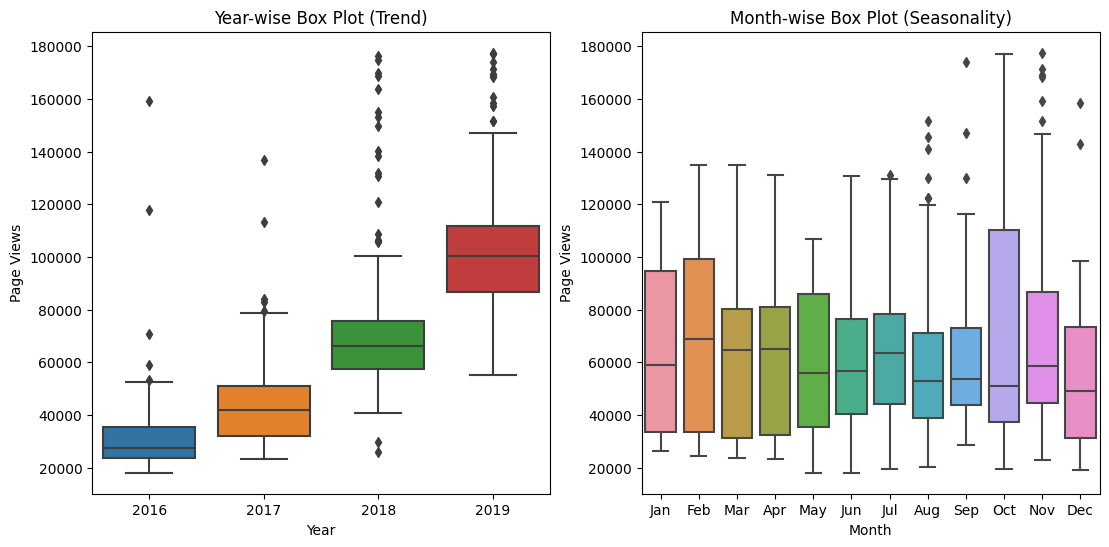

In [6]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy().reset_index()
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))
    sns.boxplot(ax=ax1, x="year", y= "value", data=df_box) 
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")
    
    month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    sns.boxplot(ax=ax2, x="month", y= "value", data=df_box, order = month_order)
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")
    
draw_box_plot()